In [1]:
#Load libraries

import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import shap
import lime
import lime.lime_tabular
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
#print('done')

In [2]:
#Load wine dataset

df = pd.read_csv('../data/datasets_4458_8204_winequality-red.csv') # Load the data

# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#print(X)
#print(Y)

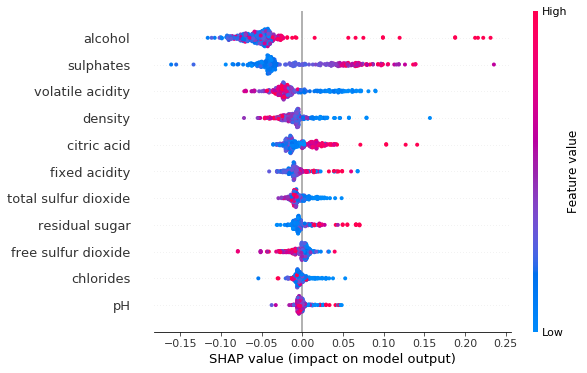

None

92.5


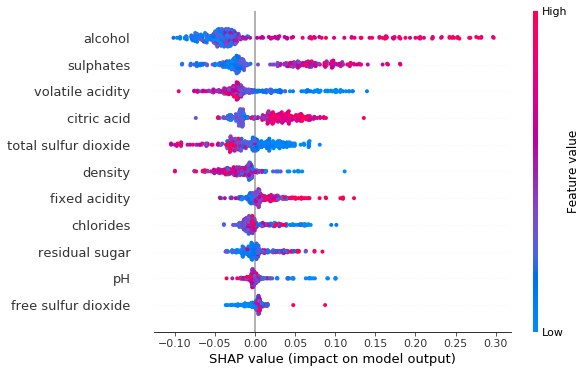

None

85.0


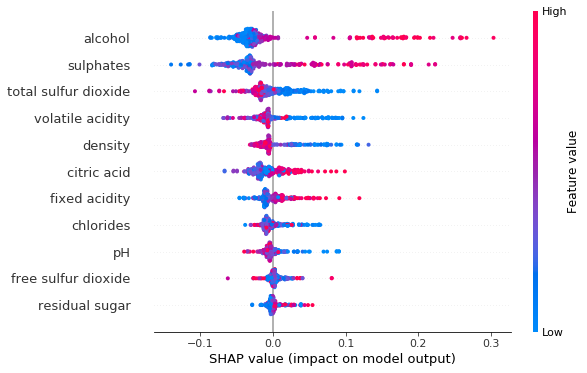

None

90.0


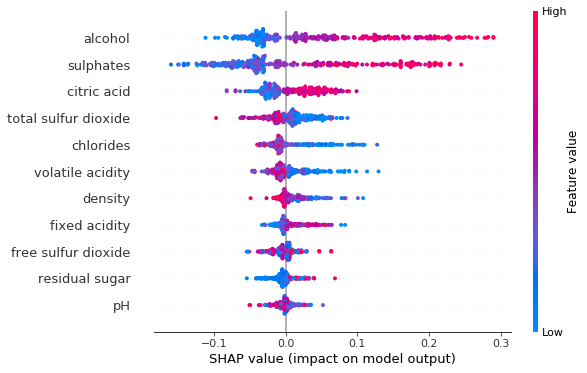

None

81.5625


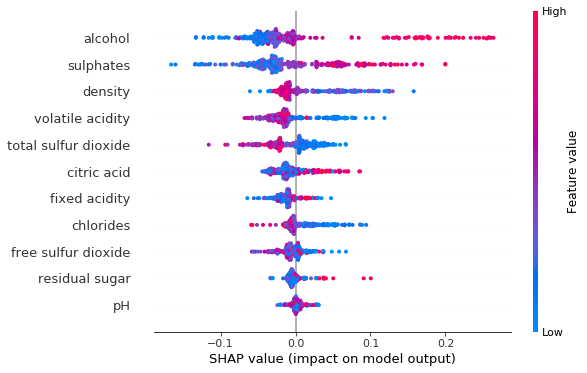

None

93.41692789968651


In [3]:
#Create a list to store accuracy of different folds
accuracy_model_rf = []

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#Create random forest classifier object
rf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)

#Create object to control the cross fold
kf = KFold(n_splits=5)

#Loops over to create 5 different folds and compute SHAP values and accuracy for each fold and store it.
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # Train the model
    model = rf.fit(X_train, y_train)
    rf_explainer = shap.TreeExplainer(model, feature_perturbation = "tree_path_dependent")
    rf_shap_values = rf_explainer.shap_values(X_test)
    display(shap.summary_plot(rf_shap_values[1], X_test))
    print(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

    # Append to accuracy_model the accuracy of the model
    accuracy_model_rf.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)


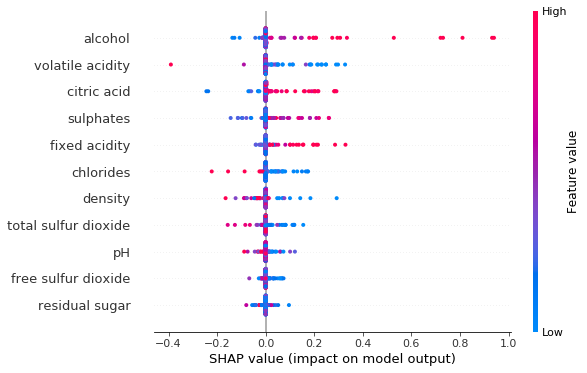

None

91.875


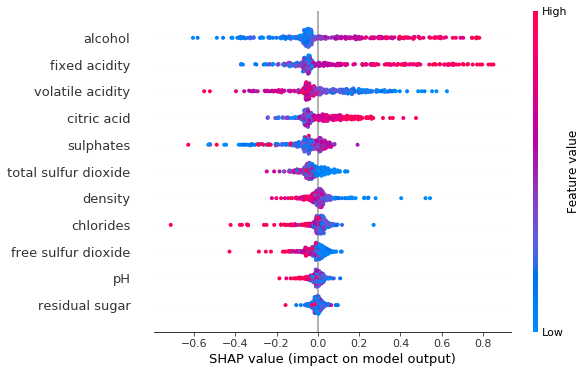

None

75.9375


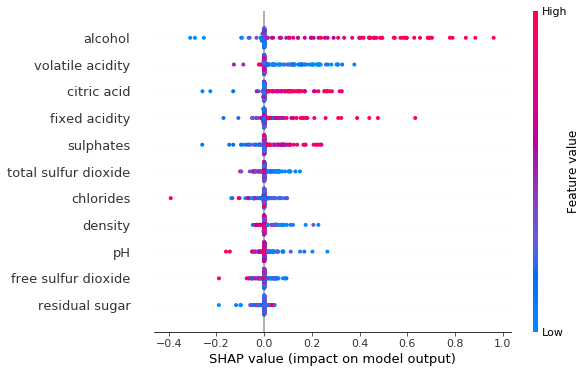

None

89.0625


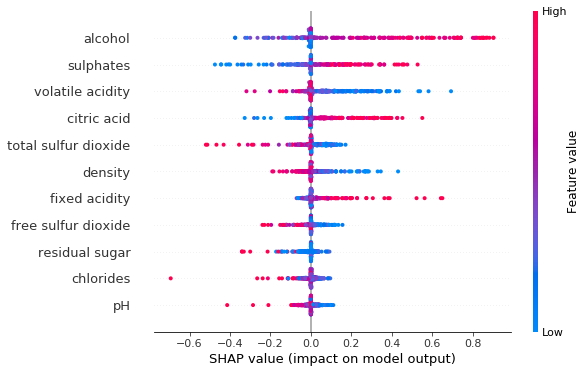

None

74.6875


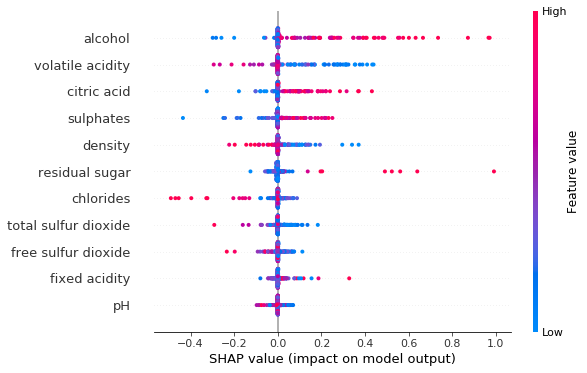

None

88.40125391849529


In [4]:
#Create a list to store accuracy of different folds
accuracy_model = []

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


#Create random forest classifier object
gnb=GaussianNB()

#Create object to control the cross fold
kf = KFold(n_splits=5)

#Loops over to create 5 different folds and compute SHAP values and accuracy for each fold and store it.
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    X_test_summary = shap.kmeans(X_test, 10)
    # Train the model
    model = gnb.fit(X_train, y_train)
    gnb_explainer = shap.KernelExplainer(gnb.predict, X_test_summary)
    gnb_shap_values = gnb_explainer.shap_values(X_test, nsamples=100, l1_reg="num_features(11)")
    display(shap.summary_plot(gnb_shap_values, X_test))
    print(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)


In [7]:
#Look at the accuracy in different folds

print(accuracy_model)
print(accuracy_model_rf)

[91.875, 75.9375, 89.0625, 74.6875, 88.40125391849529]
[92.5, 85.0, 90.0, 81.5625, 93.41692789968651]
